LeNet Architecture for MNIST Dataset Classification

In [36]:
from tensorflow.keras.datasets.mnist import load_data

Load Dataset

In [37]:
(trainX, trainy), (testX, testy)=load_data()

Summarize Loaded Dataset

In [38]:
print('Train: X=%s, y=%s' %(trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' %(testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Preprocessing

In [39]:
#Normalization
from numpy import asarray
trainX =trainX.astype('float32')/255
testX =testX.astype('float32')/255

In [40]:
#Reshape data
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2],1))
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2],1))

In [41]:
#Validation data
val_x = trainX[:5000]
val_y = trainy[:5000]

Import Layers

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten


In [43]:
input_shape=trainX[0].shape
print(input_shape)

(28, 28, 1)


Step1: Define the model

In [44]:
LeNet_5 = Sequential()
LeNet_5.add((Conv2D(6, (5,5), strides=1, activation='tanh', kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1))))
LeNet_5.add(AveragePooling2D(2,2))
LeNet_5.add((Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid')))
LeNet_5.add(AveragePooling2D(2,2))
LeNet_5.add((Conv2D(120, (5,5), strides=1, activation='tanh', padding='valid')))
LeNet_5.add(Flatten())
LeNet_5.add(Dense(120, activation='tanh'))
LeNet_5.add(Dense(84, activation='tanh'))
LeNet_5.add(Dense(10, activation='softmax'))



Step2: Compile the model


In [45]:
LeNet_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Step3: Fit the model

In [46]:
history=LeNet_5.fit(trainX,trainy, epochs=5, validation_data =(val_x, val_y))

Epoch 1/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1912 - accuracy: 0.9430 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0763 - accuracy: 0.9761 - val_loss: 0.0581 - val_accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.0500 - val_accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0253 - val_accuracy: 0.9930


Step4: Evaluate the model

In [47]:
loss, acc = LeNet_5.evaluate(testX, testy)
print('Accuracy: ', acc*100)
print('Loss: ', loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.0466 - accuracy: 0.9860
Accuracy:  98.60000014305115
Loss:  0.046558234840631485


LeNet model Summary

In [48]:
LeNet_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_5 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_6 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

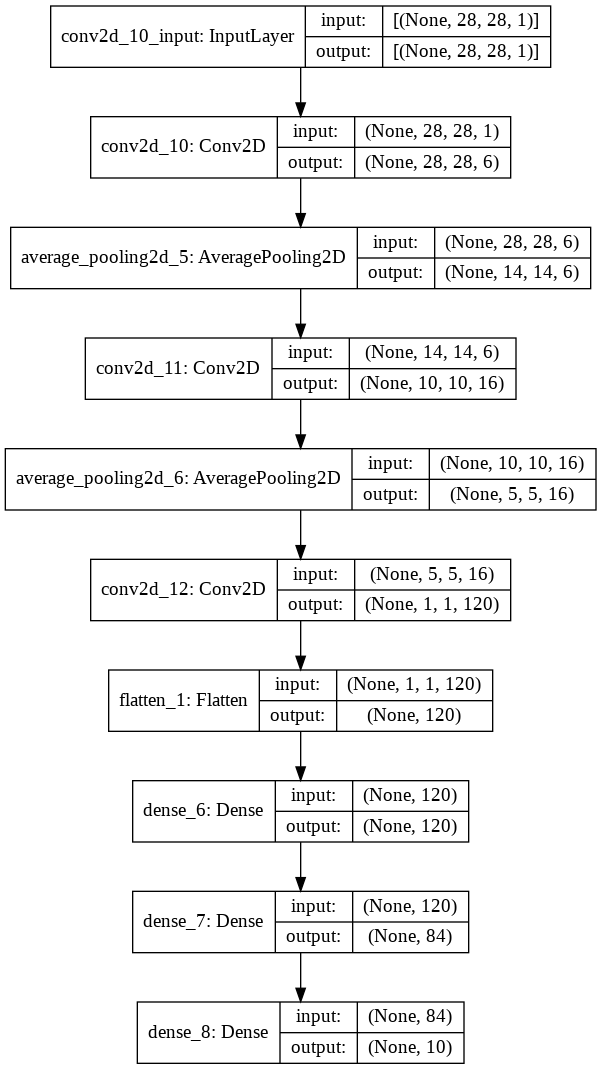

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(LeNet_5, 'model.png', show_shapes=True)

Plot Learning Curves

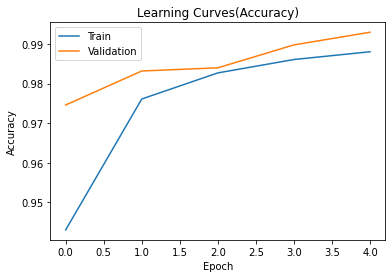

In [50]:
import matplotlib.pyplot as plt
plt.title('Learning Curves(Accuracy)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

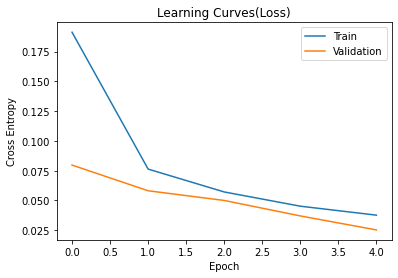

In [51]:
plt.title('Learning Curves(Loss)')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()